<center>
<img src="logo.png" height="900"> 
</center>


#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [1]:
!pip install plotly_express

In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats # модуль для работы со статистикой

import plotly
import matplotlib.pyplot as plt
import seaborn as sns

# стиль графиков
# plt.style.use('ggplot')    
plt.style.use('fivethirtyeight')
%matplotlib inline

__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице. 

In [3]:
df = pd.read_csv('walmart.csv')

In [4]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [6]:
df['Date'][:10]

0    2010-02-05
1    2010-02-12
2    2010-02-19
3    2010-02-26
4    2010-03-05
5    2010-03-12
6    2010-03-19
7    2010-03-26
8    2010-04-02
9    2010-04-09
Name: Date, dtype: object

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"][:10]

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
5   2010-03-12
6   2010-03-19
7   2010-03-26
8   2010-04-02
9   2010-04-09
Name: Date, dtype: datetime64[ns]

In [8]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Dept                     int64
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

In [9]:
df.shape

(418239, 16)

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 510782
ans1 = df.shape[0]

# your code here
ans1

418239

In [11]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас 

__в)__ Разберитесь с пропущенными переменными: 

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их. 
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [12]:
100*df.isnull().sum()/df.shape[0]

Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.736909
MarkDown2       74.143014
MarkDown3       67.825095
MarkDown4       68.363782
MarkDown5       64.570019
CPI              0.000000
Unemployment     0.000000
dtype: float64

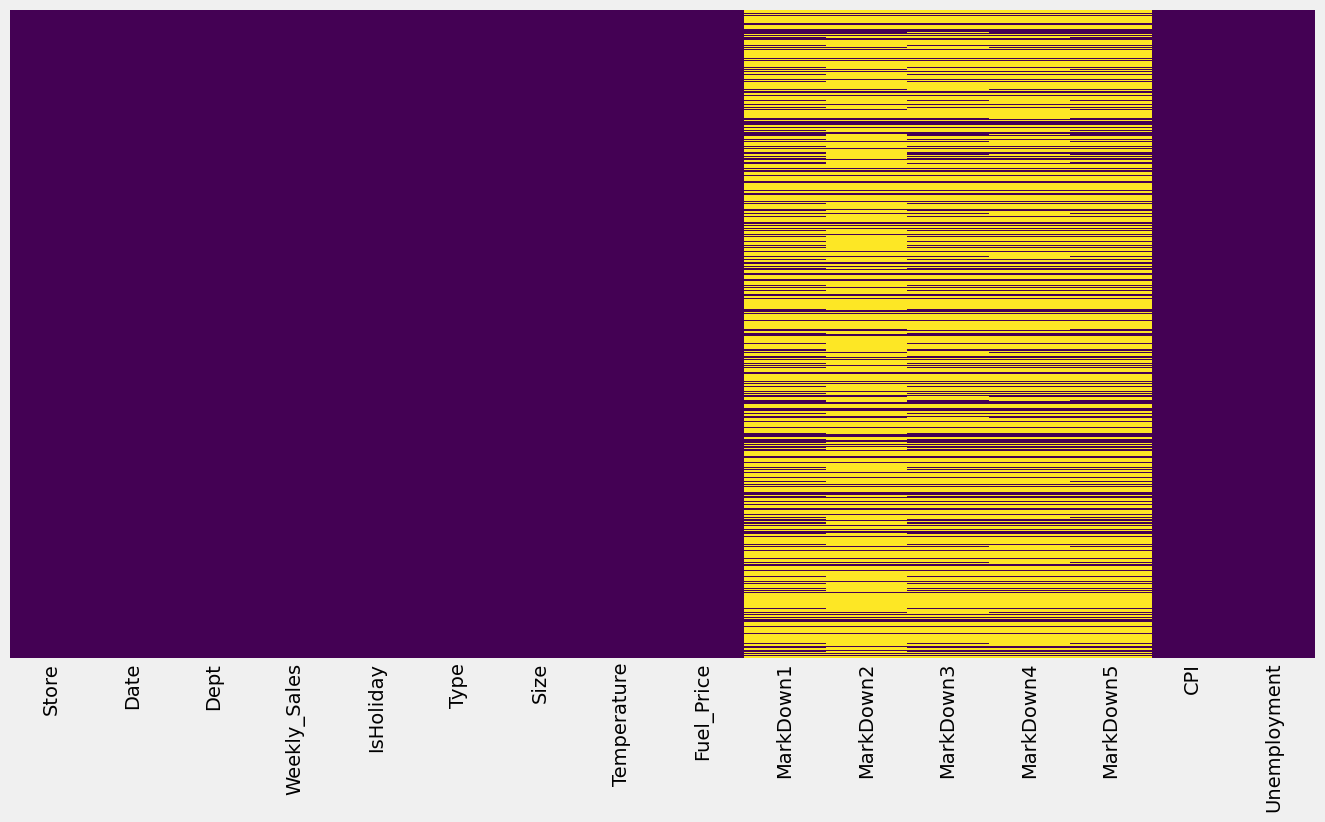

In [13]:
fig, ax = plt.subplots(figsize=(15,8))

sns_heatmap = sns.heatmap(df.sample(frac = 0.1).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis')

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 6
ans2 = 5

# your code here


In [15]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас 

In [16]:
df = df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)


In [17]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 555
ans3 = df['Store'].nunique()
ans4 = df['Dept'].nunique()
ans5 = df['Date'].max() - df['Date'].min()
print(ans3, ans4, ans5)
# your code here


45 81 987 days 00:00:00


In [19]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас 

TypeError: '>' not supported between instances of 'Timedelta' and 'int'

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны? 

In [20]:
df_day = (
    df.groupby('Date')
    .agg({'Weekly_Sales' : 'sum'})
    .sort_values('Date')
)
          
df_day.head()

,Weekly_Sales
Date,
2010-02-05,49750737.50
2010-02-12,48336670.90
2010-02-19,48276983.78
2010-02-26,43968565.13
2010-03-05,46871469.30


Text(0.5, 0, 'Дата')

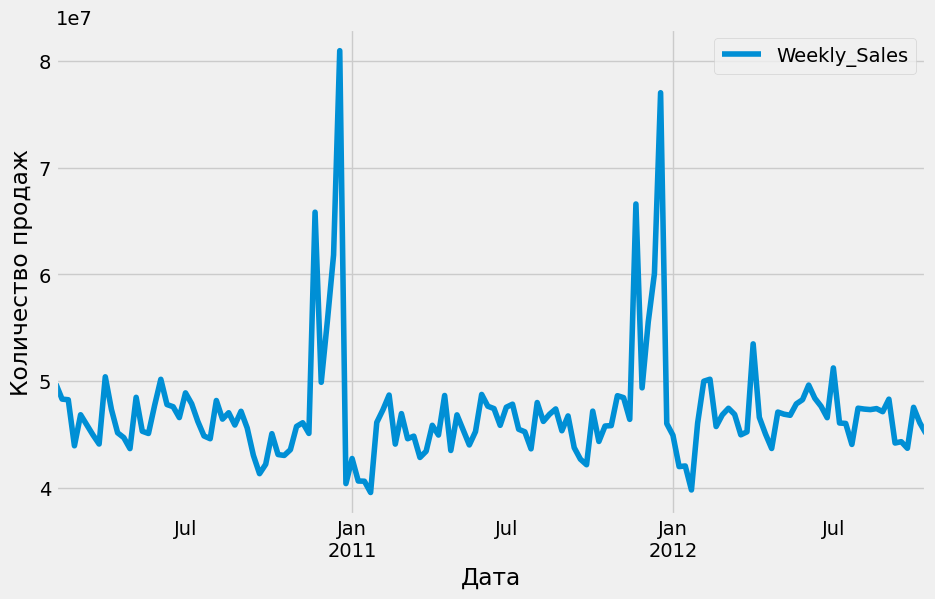

In [21]:
df_day.plot(figsize=(10,6))
plt.ylabel('Количество продаж')
plt.xlabel('Дата')

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: строка, пример: '2010-12-04'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
ans6 = str(df_day.loc[df_day['Weekly_Sales'] == df_day['Weekly_Sales'].max()].index[0].date())

# your code here
ans6

'2010-12-24'

In [ ]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас 

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной). 

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

In [23]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Dept                     int64
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [24]:
df_to_corr = df.drop(columns = ['Store', 'Date', 'IsHoliday', 'Type', 'Dept', 'Size'])
df_to_corr.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,24924.50,42.31,2.572,211.096358,8.106
1,46039.49,38.51,2.548,211.242170,8.106
2,41595.55,39.93,2.514,211.289143,8.106
3,19403.54,46.63,2.561,211.319643,8.106
4,21827.90,46.50,2.625,211.350143,8.106


In [25]:
df_corr = df_to_corr.corr()
df_corr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.002197,0.000385,-0.020791,-0.026114
Temperature,-0.002197,1.000000,0.144837,0.181292,0.097301
Fuel_Price,0.000385,0.144837,1.000000,-0.163226,-0.032461
CPI,-0.020791,0.181292,-0.163226,1.000000,-0.299723
Unemployment,-0.026114,0.097301,-0.032461,-0.299723,1.000000


<Axes: >

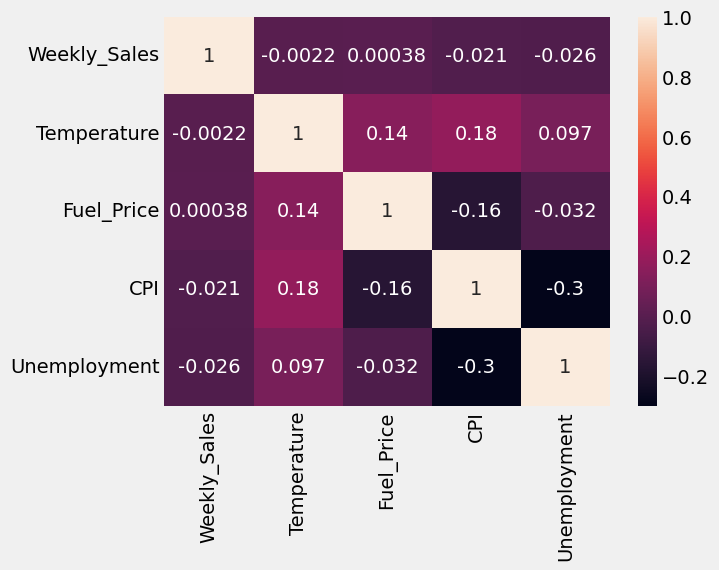

In [27]:
sns.heatmap(df_corr, annot = True)

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа действительное число, пример: 0.22222
# Не забудьте взять модуль от матрицы корреляций! 
ans7 = abs(df_corr.loc['CPI']['Unemployment'])
ans7
# your code here


np.float64(0.2997230218739881)

Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь? 
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось? 

c:\users\qazws\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\qazws\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


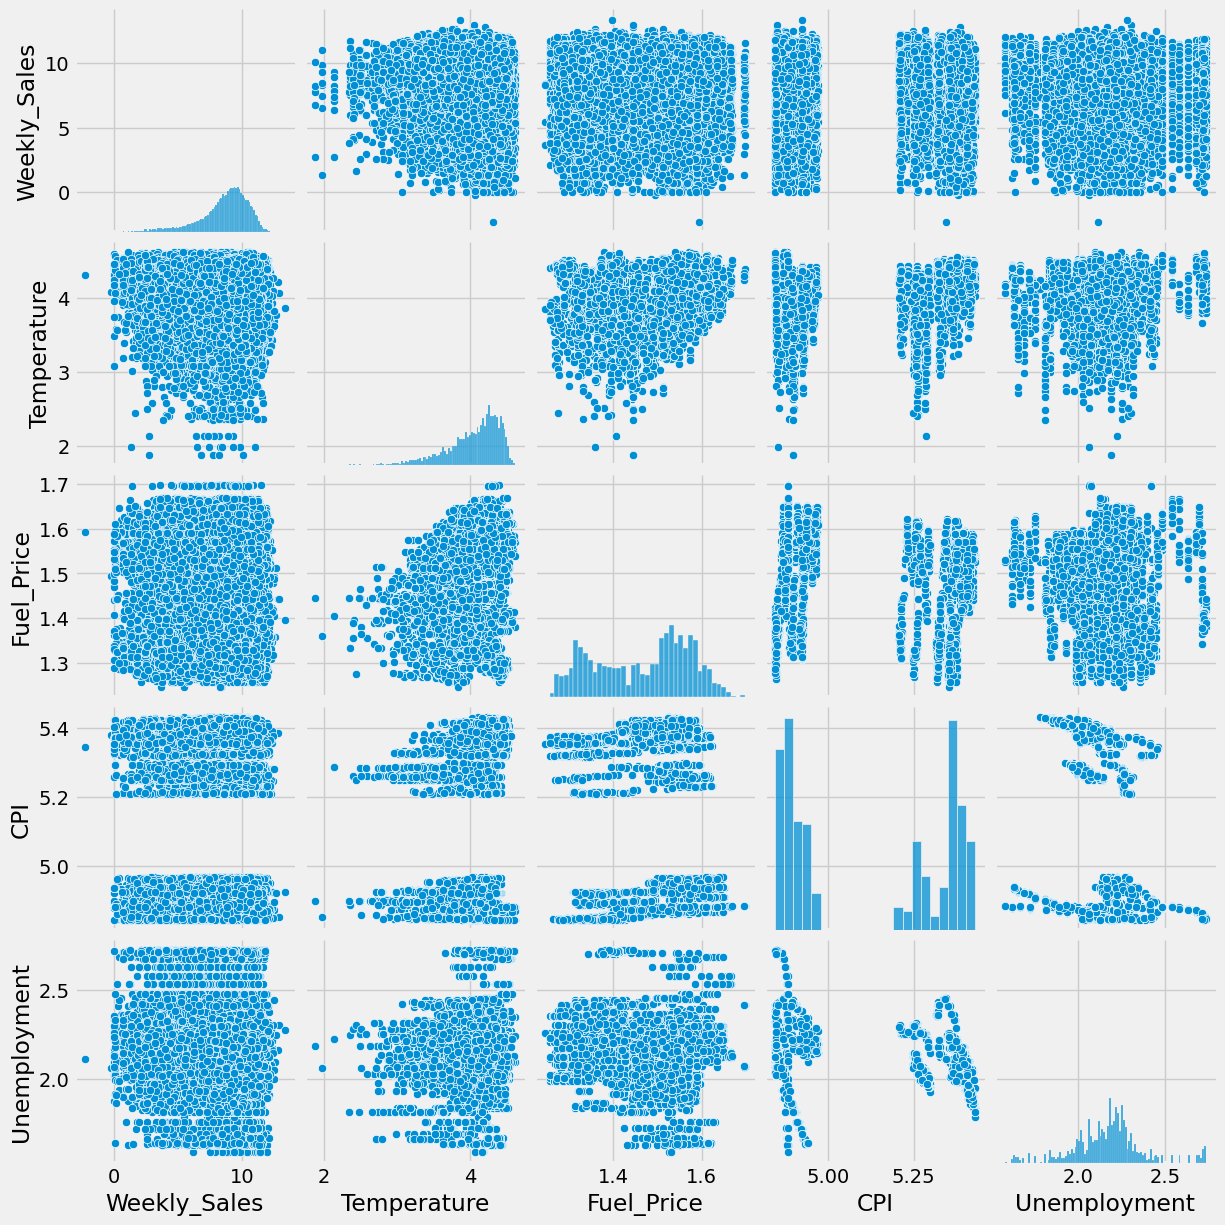

In [35]:
sns.pairplot(df_to_corr.apply(lambda w: np.log(w + 1)).sample(frac = 0.1))

In [34]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас 

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик? 

In [37]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [52]:
top5 = list(df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)[:5].index)
top5

[20, 4, 14, 13, 2]

In [54]:
df_top5 = df[df['Store'].isin(top5)]
df_top5.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
10167,2,2010-02-05,1,35034.06,False,A,202307,40.19,2.572,210.752605,8.324
10168,2,2010-02-12,1,60483.70,True,A,202307,38.49,2.548,210.897994,8.324
10169,2,2010-02-19,1,58221.52,False,A,202307,39.69,2.514,210.945160,8.324
10170,2,2010-02-26,1,25962.32,False,A,202307,46.10,2.561,210.975957,8.324
10171,2,2010-03-05,1,27372.05,False,A,202307,47.17,2.625,211.006754,8.324


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

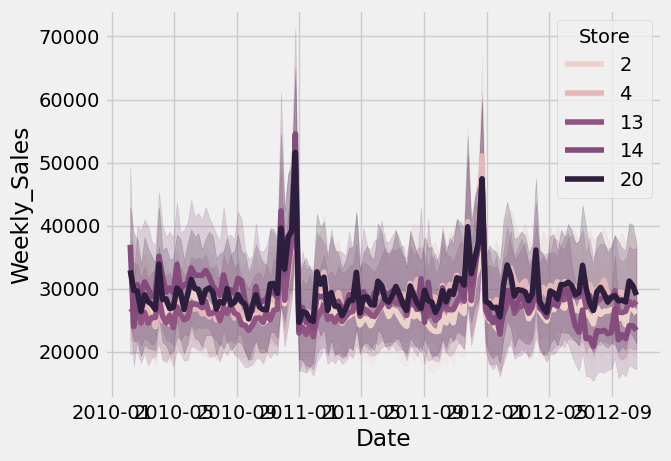

In [62]:
plt.figsize = (25,10)
sns.lineplot(data = df_top5, x = 'Date', y = 'Weekly_Sales', hue = 'Store')

__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

In [79]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df_new = df[df['Year'] == 2011]
df_new.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year
48,1,2011-01-07,1,15984.24,False,A,151315,48.27,2.976,211.404742,7.742,2011
49,1,2011-01-14,1,17359.70,False,A,151315,35.40,2.983,211.457411,7.742,2011
50,1,2011-01-21,1,17341.47,False,A,151315,44.04,3.016,211.827234,7.742,2011
51,1,2011-01-28,1,18461.18,False,A,151315,43.83,3.010,212.197058,7.742,2011
52,1,2011-02-04,1,21665.76,False,A,151315,42.27,2.989,212.566881,7.742,2011


In [85]:
top10 = list(df_new.groupby(['Dept']).agg({'Weekly_Sales' : 'sum'}).sort_values(by = 'Weekly_Sales', ascending = False)[:10].index)
top10

[92, 95, 38, 72, 90, 40, 2, 91, 13, 8]

In [89]:
df_new = df_new[df_new['Dept'].isin(top10)].groupby(['Dept']).agg({'Weekly_Sales' : 'sum'})
df_new.head()

,Weekly_Sales
Dept,
2,1.015053e+08
8,7.003633e+07
13,7.052816e+07
38,1.432613e+08
40,1.033216e+08


<Axes: xlabel='Dept'>

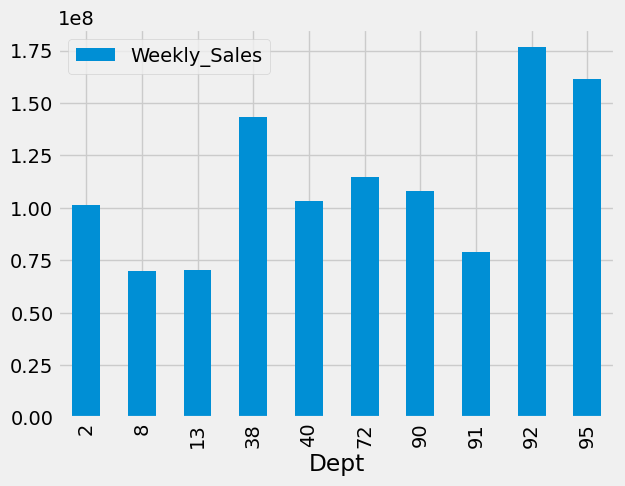

In [100]:
df_new.plot.bar()

# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому. 

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд. __Корреляция не обозначает причинности.__ 